In [1]:
import pandas as pd

In [2]:
# number of days
# 2017 = 365
# 2018 = 365
# 2019 = 365
number_of_days = 365 * 3

In [3]:
df = pd.read_csv('oil-prices/brent-daily.csv', index_col='Date', parse_dates=True)
df

Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
...           ...
2020-01-21  63.66
2020-01-22  62.11
2020-01-23  61.26
2020-01-24  59.34
2020-01-27  58.54

[8298 rows x 1 columns]

In [4]:
df = df.drop(df[(df.index < '2017-01-01') | (df.index >= '2020-01-01')].index)
df

Price
Date             
2017-01-03  55.05
2017-01-04  54.57
2017-01-05  54.99
2017-01-06  55.90
2017-01-09  54.39
...           ...
2019-12-23  67.49
2019-12-24  69.26
2019-12-27  68.91
2019-12-30  68.30
2019-12-31  67.77

[764 rows x 1 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764 entries, 2017-01-03 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   764 non-null    float64
dtypes: float64(1)
memory usage: 11.9 KB


In [6]:
dti = pd.date_range('2017-01-01', periods=number_of_days, freq='D')
df_full = pd.DataFrame([x for x in range(number_of_days)], dti, columns=['delme'])
df = df.merge(df_full, how='right' ,left_index=True, right_index=True, validate='one_to_one')
del df['delme']
df.Price.fillna(method='bfill', inplace=True)
df.Price = df.Price.apply(lambda x: x * 100).astype('int')

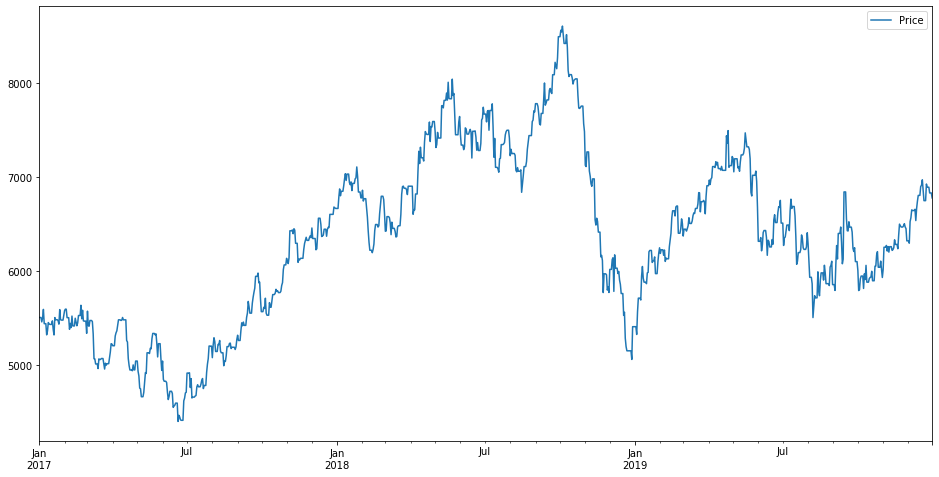

In [7]:
df.plot(figsize=(16,8))

In [8]:
df.to_csv('oil-prices/brent-2017-2019.csv',index_label='Date')